In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### read the data into a dataframe

In [2]:
train = pd.read_csv('./HW4/train.csv')

In [3]:
train.head()

,id,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,200000,2,3,1,53,0,0,0,0,...,133207,136159,138741,6500,5000,5000,5100,5000,5400,0
1,2,130000,2,3,2,39,0,0,0,2,...,130814,130758,123468,7500,10000,0,4500,4500,4179,0
2,3,350000,2,1,2,41,0,0,0,0,...,119947,117328,118400,6000,5900,5800,4100,4500,5000,0
3,4,240000,2,2,1,43,1,-2,-2,-1,...,12700,12500,26225,0,0,12700,0,13725,0,0
4,5,180000,1,2,2,28,-1,-1,-1,-1,...,332,416,416,0,416,332,500,3500,832,0


In [4]:
train.shape

(25000, 25)

### use the id as the index, since id is also not a good feature 

In [5]:
train.set_index('id', inplace = True)

In [6]:
train.columns

Index([u'X1', u'X2', u'X3', u'X4', u'X5', u'X6', u'X7', u'X8', u'X9', u'X10',
       u'X11', u'X12', u'X13', u'X14', u'X15', u'X16', u'X17', u'X18', u'X19',
       u'X20', u'X21', u'X22', u'X23', u'Y'],
      dtype='object')

In [7]:
# rename the columns with the actual information, may not be necessary
names_dict = {'X1': 'Credit_line', 'X2': 'Gender', 'X3': 'Education', 'X4': 'Martial', 'X5': 'Age',
              'X6': 'Sep', 'X7': 'Aug', 'X8': 'Jul', 'X9': 'Jun', 'X10': 'May', 'X11' : 'Apr', 
              'X12': 'bill_Sep', 'X13': 'bill_Aug', 'X14': 'bill_Jul', 'X15': 'bill_Jun', 'X16': 'bill_May',
              'X17': 'bill_Apr', 'X18': 'paid_Sep', 'X19': 'paid_Aug', 'X20': 'paid_Jul', 'X21': 'paid_Jun',
             'X22': 'paid_May', 'X23': 'paid_Apr'}

In [8]:
train.rename(columns = names_dict, inplace = True)

### set the prediction label as Y

In [9]:
# Y = train.Y
# del train['Y']
# X = train

In [10]:
train.Y.value_counts(normalize = True)

0    0.77808
1    0.22192
Name: Y, dtype: float64

In [11]:
### only 22% of the total customers are creditable

In [12]:
test_credit = train[['Credit_line', 'bill_Jun', 'paid_Jun', 'Y']]

In [13]:
test_credit[test_credit.Credit_line + test_credit.paid_Jun < test_credit.bill_Jun].Y.value_counts(normalize = True)

0    0.616708
1    0.383292
Name: Y, dtype: float64

In [14]:
### if the money paid together with credit line is smaller than the bill statement, we see more crediable customer

In [15]:
### we see a much stronger signal in payments, if someone pays on time or ahead, they are more likely to be a 
### crediable customer

### visualize feature and their relation to labels

In [16]:
### we analysis the relation of credit_line, bill_statements by grouping them in certain way

In [17]:
train.groupby(pd.cut(train.Credit_line, 10)).Y.value_counts(normalize = True)

Credit_line       Y
(9210, 89000]     0    0.699622
                  1    0.300378
(89000, 168000]   0    0.777140
                  1    0.222860
(168000, 247000]  0    0.825998
                  1    0.174002
(247000, 326000]  0    0.849554
                  1    0.150446
(326000, 405000]  0    0.854075
                  1    0.145925
(405000, 484000]  0    0.873362
                  1    0.126638
(484000, 563000]  0    0.883817
                  1    0.116183
(563000, 642000]  0    0.892857
                  1    0.107143
(642000, 721000]  0    0.928571
                  1    0.071429
(721000, 800000]  0    0.909091
                  1    0.090909
Name: Y, dtype: float64

In [18]:
### From the data, we see the frequency of creditable customers decreases with credit_line

In [19]:
sum(train.Y == 0)

19452

In [20]:
subdata_default = train[train.Y == 0].iloc[:5548, ]

In [21]:
subdata_crediable = train[train.Y == 1]

In [22]:
subdata_crediable.columns

Index([u'Credit_line', u'Gender', u'Education', u'Martial', u'Age', u'Sep',
       u'Aug', u'Jul', u'Jun', u'May', u'Apr', u'bill_Sep', u'bill_Aug',
       u'bill_Jul', u'bill_Jun', u'bill_May', u'bill_Apr', u'paid_Sep',
       u'paid_Aug', u'paid_Jul', u'paid_Jun', u'paid_May', u'paid_Apr', u'Y'],
      dtype='object')

In [23]:
train = pd.merge(subdata_crediable, subdata_default, how = 'outer')

In [24]:
X = train.iloc[:, :-1]
Y = train.Y

### Feature Selection

In [25]:
### we simply try to fit the data without the credit line and payments 

In [26]:
X.head()

,Credit_line,Gender,Education,Martial,Age,Sep,Aug,Jul,Jun,May,...,bill_Jul,bill_Jun,bill_May,bill_Apr,paid_Sep,paid_Aug,paid_Jul,paid_Jun,paid_May,paid_Apr
0,250000,1,1,1,48,0,-1,-1,-1,0,...,4898,19351,4858,6973,10021,5033,19619,4874,7050,12073
1,200000,1,1,1,34,2,2,2,2,2,...,175905,178528,175581,180145,8000,6000,7000,0,7500,6000
2,20000,1,3,1,53,0,0,2,0,0,...,19694,20004,20159,20059,2000,1000,1000,1000,1000,800
3,30000,1,2,2,25,1,2,-1,0,-1,...,261,1261,772,390,0,261,1000,772,8,390
4,120000,2,1,2,35,-1,-1,-1,-1,0,...,2558,2577,249,1976,2549,2558,2577,0,1976,1000


### Feature Normalization

In [27]:
X = (X - X.mean()) / X.std()

### PCA decomposition

In [28]:
from sklearn import decomposition, metrics

In [29]:
d_pca = decomposition.PCA(n_components = 2, random_state = 1)

In [30]:
d_pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=1,
  svd_solver='auto', tol=0.0, whiten=False)

In [31]:
Xt = d_pca.transform(X)
Xt.shape

(11096, 2)

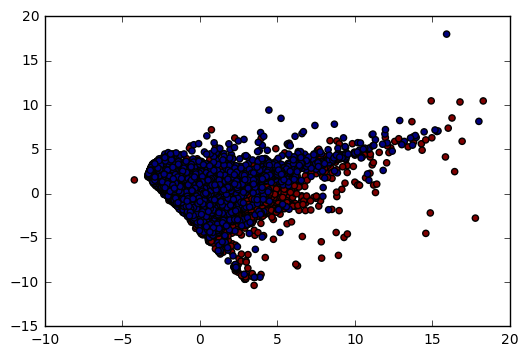

In [32]:
plt.scatter(Xt[:, 0], Xt[:, 1], c = Y)

### Neural Network classification

In [33]:
### try a neural network
from sklearn import neural_network

In [83]:
clf_NN = neural_network.MLPClassifier(activation='relu', solver='sgd')

In [84]:
clf_NN = neural_network.MLPClassifier(hidden_layer_sizes=(300, 200, 10), max_iter = 1000)

In [85]:
clf_NN.fit(X, Y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(300, 200, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [37]:
thresholds = np.linspace(0.5, 0.95, num = 10)
thresholds

array([ 0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,  0.9 ,  0.95])

In [38]:
Y_pred = clf_NN.predict(X)

### Simple Logistic Regression

In [39]:
from sklearn import linear_model

In [40]:
clf_log = linear_model.LogisticRegressionCV(class_weight = 'balanced', cv = 10)

In [41]:
clf_log.fit(X, Y)

LogisticRegressionCV(Cs=10, class_weight='balanced', cv=10, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [42]:
Y_pred = clf_log.predict(X)

### SVM Classifier

In [43]:
from sklearn import svm

In [44]:
c = np.array([0.01, 0.03, 0.1, 0.3, 1.0, 3.0, 10.0])

In [45]:
clf_svm = svm.SVC()

In [46]:
clf_svm.fit(X, Y)
Y_pred = clf_svm.predict(X)
print "Accuracy for penalty %f is %f" %(1.0, metrics.accuracy_score(Y_pred, Y))

Accuracy for penalty 1.000000 is 0.720350


In [47]:
metrics.confusion_matrix(Y, Y_pred)

array([[4622,  926],
       [2177, 3371]])

In [48]:
## slightly better result than ANN

### KNN methods

In [49]:
from sklearn import neighbors

In [50]:
clf_KNN = neighbors.KNeighborsClassifier(n_neighbors = 5)

In [51]:
clf_KNN.fit(X, Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [52]:
Y_pred = clf_KNN.predict(X)
metrics.confusion_matrix(Y, Y_pred)

array([[4397, 1151],
       [1363, 4185]])

### Naive-Bayes 

In [53]:
from sklearn import naive_bayes

In [54]:
clf_nb = naive_bayes.GaussianNB()

In [55]:
clf_nb.fit(X, Y)

GaussianNB(priors=None)

In [56]:
Y_pred = clf_nb.predict(X)

### Test Set Result

In [87]:
test = pd.read_csv('./HW4/test.csv')

In [88]:
test.set_index('id', inplace=True)

In [89]:
test.rename(columns=names_dict, inplace=True)

In [90]:
test.shape

(5000, 23)

In [91]:
X_test = test
X_test = (X_test - X_test.mean() / X_test.std())

In [92]:
X_test.shape

(5000, 23)

In [93]:
test_Truth = pd.read_csv('./HW4/testGroundTruth.csv')

In [94]:
Y_test = test_Truth.Y

In [95]:
test_Truth.shape

(5000, 25)

In [96]:
Y_pred = clf_NN.predict(X_test)

In [98]:
print metrics.confusion_matrix(Y_test, Y_pred)

[[ 595 3317]
 [ 126  962]]


### Random Forest

In [66]:
from sklearn import ensemble

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 4)

In [69]:
clf_rf = ensemble.RandomForestClassifier(class_weight='balanced')

In [70]:
clf_rf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [71]:
Y_pred = clf_rf.predict(X_test)

In [72]:
print metrics.classification_report(Y_test, Y_pred)

             precision    recall  f1-score   support

          0       0.65      0.74      0.69      1112
          1       0.70      0.60      0.64      1108

avg / total       0.67      0.67      0.67      2220



In [73]:
metrics.confusion_matrix(Y, clf_rf.predict(X))

array([[5224,  324],
       [ 573, 4975]])

### Precison and Confusion Matrix

In [74]:
from sklearn import metrics

In [86]:
Y_test_pred = clf_NN.predict(X_test)
print "ANN Regression accuracy: %f, precision: %f, recall: %f" % \
(metrics.accuracy_score(Y_test, Y_test_pred), metrics.precision_score(Y_test, Y_test_pred), 
 metrics.recall_score(Y_test, Y_test_pred))
print ""
print "Confusion matrix: " 
metrics.confusion_matrix(Y_test, Y_test_pred)

ANN Regression accuracy: 0.911712, precision: 0.910811, recall: 0.912455

Confusion matrix: 


array([[1013,   99],
       [  97, 1011]])

In [76]:
Y_test_pred = clf_log.predict(X_test)
print "Logistic Regression accuracy: %f, precision: %f, recall: %f" % \
(metrics.accuracy_score(Y_test, Y_test_pred), metrics.precision_score(Y_test, Y_test_pred), 
 metrics.recall_score(Y_test, Y_test_pred))
print ""
print "Confusion matrix: " 
metrics.confusion_matrix(Y_test, Y_test_pred)

Logistic Regression accuracy: 0.669820, precision: 0.674095, recall: 0.655235

Confusion matrix: 


array([[761, 351],
       [382, 726]])

In [77]:
Y_test_pred = clf_svm.predict(X_test)
print "SVM accuracy: %f, precision: %f, recall: %f" % \
(metrics.accuracy_score(Y_test, Y_test_pred), metrics.precision_score(Y_test, Y_test_pred), 
 metrics.recall_score(Y_test, Y_test_pred))
print ""
print "Confusion matrix: " 
metrics.confusion_matrix(Y_test, Y_test_pred)

SVM accuracy: 0.724324, precision: 0.785057, recall: 0.616426

Confusion matrix: 


array([[925, 187],
       [425, 683]])

In [78]:
Y_test_pred = clf_KNN.predict(X_test)
print "KNN accuracy: %f, precision: %f, recall: %f" % \
(metrics.accuracy_score(Y_test, Y_test_pred), metrics.precision_score(Y_test, Y_test_pred), 
 metrics.recall_score(Y_test, Y_test_pred))
print ""
print "Confusion matrix: " 
metrics.confusion_matrix(Y_test, Y_test_pred)

KNN accuracy: 0.768919, precision: 0.776744, recall: 0.753610

Confusion matrix: 


array([[872, 240],
       [273, 835]])

In [79]:
Y_test_pred = clf_nb.predict(X_test)
print "Naive-Bayes accuracy: %f, precision: %f, recall: %f" % \
(metrics.accuracy_score(Y_test, Y_test_pred), metrics.precision_score(Y_test, Y_test_pred), 
 metrics.recall_score(Y_test, Y_test_pred))
print ""
print "Confusion matrix: " 
metrics.confusion_matrix(Y_test, Y_test_pred)

Naive-Bayes accuracy: 0.636937, precision: 0.601206, recall: 0.809567

Confusion matrix: 


array([[517, 595],
       [211, 897]])

In [80]:
Y_test_pred = clf_rf.predict(X_test)
print "Random Forest accuracy: %f, precision: %f, recall: %f" % \
(metrics.accuracy_score(Y_test, Y_test_pred), metrics.precision_score(Y_test, Y_test_pred), 
 metrics.recall_score(Y_test, Y_test_pred))
print ""

print metrics.classification_report(Y_test, Y_test_pred)

Random Forest accuracy: 0.670270, precision: 0.698732, recall: 0.596570

             precision    recall  f1-score   support

          0       0.65      0.74      0.69      1112
          1       0.70      0.60      0.64      1108

avg / total       0.67      0.67      0.67      2220



In [81]:
submit_data = pd.read_csv('./HW4/Submmission.csv')

In [1]:
#submit_data.y = Y_test_pred

In [ ]:
submit_data.to_csv('./HW4/Submission.csv')